importing libraries

In [71]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

specifying Times New Roman font and to force that within plotting commands

In [72]:
tnr = "Times New Roman"
plt.rcParams['font.sans-serif'] = tnr
plt.rcParams['font.family'] = tnr

uploading files with data to be plotted

In [73]:
data = np.genfromtxt('parameters.txt')

defining variables for plotting

In [74]:
wavelength = data[1:len(data), 0:1]

T_star = data[1:len(data), 1:2]
T_lower_error = data[1:len(data), 2:3]
T_upper_error = data[1:len(data), 3:4]
T_error = np.array([T_lower_error, T_upper_error])

R_o = data[1:len(data), 4:5]
R_lower_error = data[1:len(data), 5:6]
R_upper_error = data[1:len(data), 6:7]
R_error = np.array([R_lower_error, R_upper_error])

norm = data[1:len(data), 7:8]
norm_lower_error = data[1:len(data), 8:9]
norm_upper_error = data[1:len(data), 9:10]
norm_error = np.array([norm_lower_error, norm_upper_error])

choosing parameter vs wavelength

In [75]:
# if plotting taustar vs wavelength, param = 0
# if plotting Ro vs wavelength, param = 1
# if plotting norm vs wavelength, param = 2
param = 0

linking plotted y variable to specific parameter

In [76]:
if param == 0:
    y = T_star
    y_error = T_error
    y_upper_error = T_upper_error
    param_name = r'$\tau_{\star}$'
    param_tp = 'taustar'

if param == 1:
    y = R_o
    y_error = R_error
    y_upper_error = R_upper_error
    param_name = r'$R_o$'
    param_tp = 'Ro'
    
if param == 2:
    y = norm
    y_error = norm_error
    y_upper_error = norm_upper_error
    param_name = 'norm'
    param_tp = 'norm'

plotting

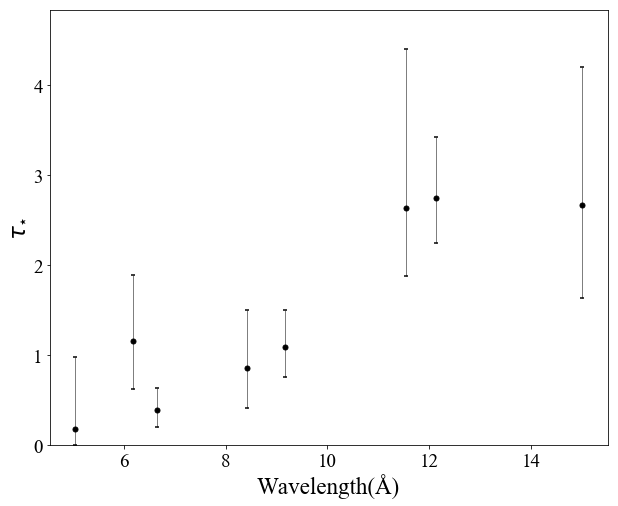

In [77]:
# determining plot size and labeling the plot

plt.figure(figsize = (10, 8))

plt.xlabel('Wavelength(Å)', fontsize = 23)
plt.ylabel(param_name, fontsize = 23)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)

plt.ylim(bottom = 0., top = (np.max(y+y_upper_error))*1.1)


# plotting data points and their error bars

plt.plot(wavelength, y, 'o', color = 'black', markersize = 5)
plt.errorbar(wavelength, y, yerr = y_error, ls = 'none', color = 'black', linewidth = 0.5,capsize = 2.,capthick = 1.5)



#axs[0].set_ylim(bottom = 0., top = np.max(T_star+T_upper_error)+0.5)

plt.savefig(param_tp+'_vs_wavelength.png')
plt.show()